In [39]:
from bs4 import BeautifulSoup
from bs4 import NavigableString
import re
from itertools import groupby

In [40]:
import requests

In [41]:
def get_HTML(url):
    headers =  {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/57.0.2987.133 Safari/537.36' }    
    resp_data = requests.get(url, headers=headers).text
    return resp_data

In [42]:
def scrape_soup_cryptic_crossword_data(current_node):
    opened = []
    reached_across = False
    data = [] 
    while(current_node):
        if hasattr(current_node,'contents') and current_node.contents:
            opened += reversed(current_node.contents)
        else:
            if type(current_node) is NavigableString :
                p = current_node.parent
                style = p.get('style')
                name = p.name
                if(name=="u"or name=='strong'or(style and len(re.findall('(underline?|\<u\>)',style)))):
                    if(current_node != "\n"):
                        data.append('|{}|'.format(current_node))
                else:
                    data.append(current_node)


#                     has_underline = len(re.search('underline?',str(p)).groups())>0
                    
        if len(opened) > 0:
            current_node = opened.pop()
        else:
#             print(opened)
            break
    
    return [x[0] for x in groupby(data)]
    
            
    

In [43]:
def scrape_html_for_cryptic_crossword_data(html):
    try:
        soup = BeautifulSoup(html, "lxml")
        body = soup.find('body')
        return scrape_soup_cryptic_crossword_data(body.parent)
    except Exception as e:
        print(e)
        return []

In [44]:
#!/usr/bin/python

import os

dataset = []
i = 0
# traverse root directory, and list directories as dirs and files as files
for root, dirs, files in os.walk("/Users/life/Documents/www.fifteensquared.net"):
    path = root.split(os.sep)
    for file in files:
        if len(re.findall('.html$',file))>0:
            file_path = '/'.join(path)+'/'+file
            i%1000 == 0 and print(i)
            i+=1
            try:
                with open(file_path,encoding="utf8") as html:
                    dataset += scrape_html_for_cryptic_crossword_data(html)
            except Exception as e:
                print(e)
                continue

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000


In [45]:
# dataset

In [46]:
corpus = re.sub('[\n\t]',' ',"".join(dataset))

In [47]:
corpus = re.sub('\xa0','',corpus)

In [52]:
corpus[:1000]

' Fifteensquared – Never knowingly undersolved.     window._wpemojiSettings = {"baseUrl":"https:\\/\\/s.w.org\\/images\\/core\\/emoji\\/11\\/72x72\\/","ext":".png","svgUrl":"https:\\/\\/s.w.org\\/images\\/core\\/emoji\\/11\\/svg\\/","svgExt":".svg","source":{"concatemoji":"http:\\/\\/www.fifteensquared.net\\/wp-includes\\/js\\/wp-emoji-release.min.js?ver=4.9.8"}};    !function(a,b,c){function d(a,b){var c=String.fromCharCode;l.clearRect(0,0,k.width,k.height),l.fillText(c.apply(this,a),0,0);var d=k.toDataURL();l.clearRect(0,0,k.width,k.height),l.fillText(c.apply(this,b),0,0);var e=k.toDataURL();return d===e}function e(a){var b;if(!l||!l.fillText)return!1;switch(l.textBaseline="top",l.font="600 32px Arial",a){case"flag":return!(b=d([55356,56826,55356,56819],[55356,56826,8203,55356,56819]))&&(b=d([55356,57332,56128,56423,56128,56418,56128,56421,56128,56430,56128,56423,56128,56447],[55356,57332,8203,56128,56423,8203,56128,56418,8203,56128,56421,8203,56128,56430,8203,56128,56423,8203,56128,

In [50]:
clues = re.findall('\d{1,2}[\.\s]*[A-Z]+[&…“”\s\w\-–—,’‘?;:!\/\\\|]+[\s]+\(\d{1,2}[,\-]*\d*\)',corpus)

In [51]:
len(clues)

77234

In [53]:
clues[1000:1500]

['25  Dishevelled I’m sat with bin consuming 5 |nutritional items| (1,8)',
 '6  Wystan Hugh leaves university for |foreign climes| (4)',
 '8  Railway couple |given lift| (8)',
 '15  Old cattle people in |gas production| (9)',
 '2  Elephant Man, taking look round court, sees |monster in 13 3| (8,6)',
 '1A ENIACS |Old computers| malfunctioning in case (6)',
 '6A TAVERT |In Scotland bewildered| clergyman returns in shabby clothes (6)',
 '11A SOMONI |Asian cash| provided twothirds of coins (6)',
 '12A SLUSHY |Sentimental| fling masking most of passion (6)',
 '13A CUPTIE Clubs to conclude |match| (6)',
 '14A TEETER Almost force Queen |to hesitate| (6)',
 '15A ADNEXA Notice new cut back for |gland’s attachments| (6)',
 '17A TERRAN |Perhaps, Asimov’s human| is from Jupiter randomly in disguise (6)',
 '18A PISTON Iron peg limits square |valve mechanism| (6)',
 '19A INHERE |Reside| at hotel till old (6)',
 '20A THAIRM Asian intermittently drums |Ian’s musical string| (6)',
 '29A HEPTAD |Group| 

In [54]:
inputs = [(clues[i],clues[i+1],i) for i in range(len(clues)-1)]

In [55]:
inputs[0]

('9 A vehicle kept by retired German in |US port| (8)',
 '10 Sporting contest a timeless group backed in |dome| (6)',
 0)

In [56]:
def get_explanation(curr_clue,next_clue,i):
    regex = re.escape(curr_clue) + '(.+?)' + re.escape(next_clue)
    try:
        return re.search(regex,corpus).group(1)
    except Exception:
        return "ERROR"


In [57]:
from itertools import starmap
from multiprocessing import Pool

In [58]:
with Pool() as pool:
    starmap_explanations = pool.starmap(get_explanation,inputs)
# starmap_explanations = []
# counter = 0
# for i in inputs:
#     if(counter % 100 == 0): print(counter)
#     counter += 1
#     starmap_explanations.append(get_explanation(i[0],i[1],i[2]))

In [59]:
starmap_explanations[12]

' |ZOOM| : Z(the last;latest character in the English alphabet) + reversal of(bringing up, in a down clue) MOO(to low;to make the deep low sound uttered by cattle]. Answer: The cinematic technique of bringing a subject into close-up (zoom in) or causing it to recede (zoom out) while maintaining focus, using a zoom lens. '

In [60]:
clues[:10]

['9 A vehicle kept by retired German in |US port| (8)',
 '10 Sporting contest a timeless group backed in |dome| (6)',
 '13 A priest, old chap moved when digesting extremes of religiosity in |unorthodox books| (9)',
 '16 Second rousing cheer enveloping sports body and |athlete| (2,5)',
 '19 Dubious name associated with individual |plant| (7)',
 '21 Report of official banning |device to detect change|? (6)',
 '27 Succeed at university in |medical examination|? (6-2)',
 '29 Stay hiker disrupted with no end of drink in |a frenzied state| (8)',
 '1 Contemplate banning outsiders |being legitimate| (6)',
 '2 Bird beginning to swoop in part for |fish| (5,4)']

In [61]:
import pandas

In [62]:
clues_cpy = clues[:-1]

In [63]:
len(clues_cpy)

77233

In [64]:
len(starmap_explanations)

77233

In [65]:
df = pandas.DataFrame({'clue':clues_cpy,'exp':starmap_explanations})

In [66]:
df['len'] = df['exp'].apply(lambda x:len(x))

In [67]:
from matplotlib import pyplot

9867.38988515272


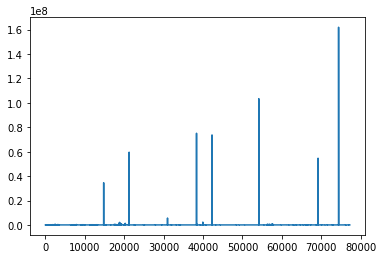

In [68]:
print(df['len'].mean())
pyplot.plot(df['len'])

In [69]:
df = df[df['len']<400]

In [70]:
df = df.reset_index(drop=True)

In [71]:
df[df.clue.apply(lambda x:len(re.findall('\|.+\|?',x))>0)]

,clue,exp,len
0,9 A vehicle kept by retired German in |US port...,|SAVANNAH| : [ A + VAN(a vehicle) ] contained...,112
1,10 Sporting contest a timeless group backed in...,"|CUPOLA| : CUP(a sporting contest, eg. the FA...",228
2,16 Second rousing cheer enveloping sports body...,|MO FARAH| : [ MO(short for a moment;a second...,336
3,19 Dubious name associated with individual |pl...,|ANEMONE| : Anagram of(Dubious) NAME placed a...,133
4,29 Stay hiker disrupted with no end of drink i...,|HYSTERIA| : Anagram of(disrupted) “stay hike...,104
5,1 Contemplate banning outsiders |being legitim...,|ONSIDE| : “consider”(to contemplate;think ab...,195
6,2 Bird beginning to swoop in part for |fish| (...,|DOVER SOLE| : DOVE(a bird belonging to the s...,294
7,8 Senior diplomat with a country house almost ...,|HEADACHE| : HE(abbrev. for “His/Her Excellen...,254
8,11 Latest character bringing up low |cinematic...,|ZOOM| : Z(the last;latest character in the E...,321
9,15 Blame about to be forgotten in |testing per...,|PROBATION| : “reprobation”(disapproval;conde...,243


In [73]:
# df.to_csv("../fifteen_dataset/fifteen_all_tagged_3.csv",index=False)